<a href="https://colab.research.google.com/github/areias/healthcare_fraud/blob/main/healthcare_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Healthcare Fraud Detection

<br>

### Potential Analysis Plan (let's build on this iteratively)
https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

* first steps, data exploration and summary stats of data

* modeling: it's a binary classification problem, let's maybe try a logistic regression on it as a baseline from scikit-learn

    * https://scikit-learn.org/stable/getting_started.html

    * https://scikit-learn.org/stable/tutorial/index.html#tutorial-menu

    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


* Graph analysis: create a schema to upload to neo4j as a graph database

![schema image](https://github.com/areias/healthcare_fraud/blob/main/claims_schema_1.png)


* modeling plus: try graph machine learning models on it 

* experiment tracking https://wandb.ai/ and integrating with scikit-learn https://docs.wandb.ai/guides/integrations/scikit

* Because only 10% of records are fraudulent we could try some imbalanced data
processing methods such as oversampling 

<br>

### Other potentially useful information
* This document describes a dataset very similar to this one so I think we can assume that the diagnosis codes are the same ICD-9 and the 
* https://www.hipaaspace.com/Medical_Billing/Coding/ICD-9/Diagnosis/2768
* the variables  NoOfMonths_PartACov and NoOfMonths_PartBCov refer to the months the patient was covered by one of two Medicare programs: Fee-for-Service (FFS) Part A and Part B.


<br>

### Examples of other's analysis and results so we can compare (and be better! ha)

* https://kundusoumya98.medium.com/healthcare-provider-fraud-detection-and-analysis-using-machine-learning-632f7a380c79 - best F1 is 0.49

* https://medium.com/analytics-vidhya/provider-fraud-detection-in-the-healthcare-domain-a6f76f76d8ba - best F1 is 0.65 with xgb classifier but logistic regressionhas f1 of 0.63 so not that much worse

* https://github.com/sitathomas/Healthcare_Fraud/blob/main/Presentation_Slides.pdf - their f1 must be around 0.64 (I had to guesstimate based on their ROC curve for the Gradient boosting model)

* https://github.com/anikmanik04/healthcare-provider-fraud-detection/blob/main/07_Final_Pipeline_CS1.ipynb - best f1 0.61 from Random Forest model










# Project understanding: 
Project Objectives
Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.

Problem Statement
The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

Introduction to the Dataset
For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Lets s see their details :

A) Inpatient Data

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

B) Outpatient Data

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) Beneficiary Details Data

This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

In [ ]:
import pandas as pd

In [ ]:
train_ben=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
test_ben=pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
train_in=pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_out=pd.read_csv('Train_Outpatientdata-1542865627584.csv')
train=pd.read_csv('Train-1542865627584.csv')

In [ ]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
train.shape

(5410, 2)

**Checking for unbalanced data:**

In [ ]:
train.PotentialFraud.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
train['PotentialFraud'].value_counts(normalize=True)*100

No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64

In [ ]:
train.isna().sum()

Provider          0
PotentialFraud    0
dtype: int64

## Beneficiary Dataset:

In [ ]:
train_ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
train_ben.shape

(138556, 25)

In [ ]:
test_ben.shape

(63968, 25)

In [ ]:
train_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
train_ben.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


**Checking for missing values:**

In [ ]:
train_ben.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

**Checking variables' correlation**

In [ ]:
train_ben.corr().round(2)

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
Gender,1.00,0.00,0.01,0.00,0.01,0.01,-0.02,-0.01,-0.01,0.01,-0.01,-0.02,-0.02,-0.01,-0.02,-0.01,-0.00,0.00,-0.00,0.01,0.01
Race,0.00,1.00,-0.05,-0.00,-0.01,-0.00,-0.00,0.00,-0.00,0.01,0.00,-0.01,0.00,0.01,0.01,0.00,0.00,-0.00,-0.00,0.00,0.00
State,0.01,-0.05,1.00,0.13,-0.00,0.00,0.00,-0.00,-0.00,0.01,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
County,0.00,-0.00,0.13,1.00,0.01,0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.01,0.01
NoOfMonths_PartACov,0.01,-0.01,-0.00,0.01,1.00,0.24,-0.02,-0.02,-0.02,-0.01,-0.02,-0.02,-0.04,-0.03,-0.01,-0.02,-0.01,-0.00,0.00,0.01,0.01
NoOfMonths_PartBCov,0.01,-0.00,0.00,0.01,0.24,1.00,-0.02,-0.03,-0.03,-0.01,-0.02,-0.02,-0.05,-0.04,-0.02,-0.02,-0.01,0.00,0.01,0.02,0.02
ChronicCond_Alzheimer,-0.02,-0.00,0.00,-0.01,-0.02,-0.02,1.00,0.20,0.20,0.06,0.18,0.18,0.21,0.17,0.09,0.11,0.13,-0.13,-0.16,-0.09,-0.10
ChronicCond_Heartfailure,-0.01,0.00,-0.00,-0.01,-0.02,-0.03,0.20,1.00,0.31,0.09,0.26,0.17,0.29,0.29,0.10,0.15,0.14,-0.18,-0.20,-0.15,-0.15
ChronicCond_KidneyDisease,-0.01,-0.00,-0.00,-0.01,-0.02,-0.03,0.20,0.31,1.00,0.12,0.26,0.18,0.31,0.25,0.10,0.16,0.15,-0.27,-0.27,-0.21,-0.21
ChronicCond_Cancer,0.01,0.01,0.01,-0.00,-0.01,-0.01,0.06,0.09,0.12,1.00,0.11,0.05,0.10,0.10,0.05,0.07,0.04,-0.09,-0.09,-0.07,-0.08


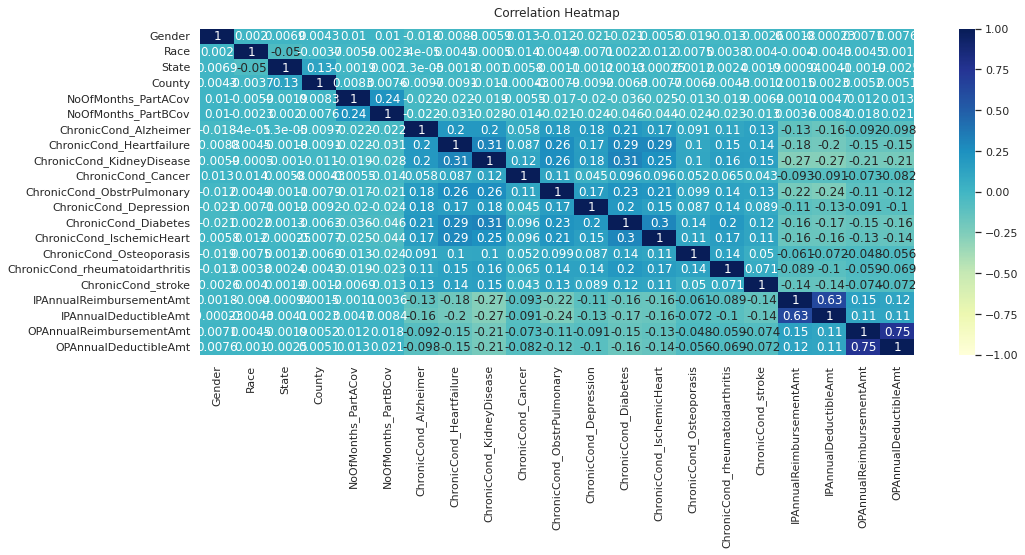

In [ ]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_ben.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Data Visualization**

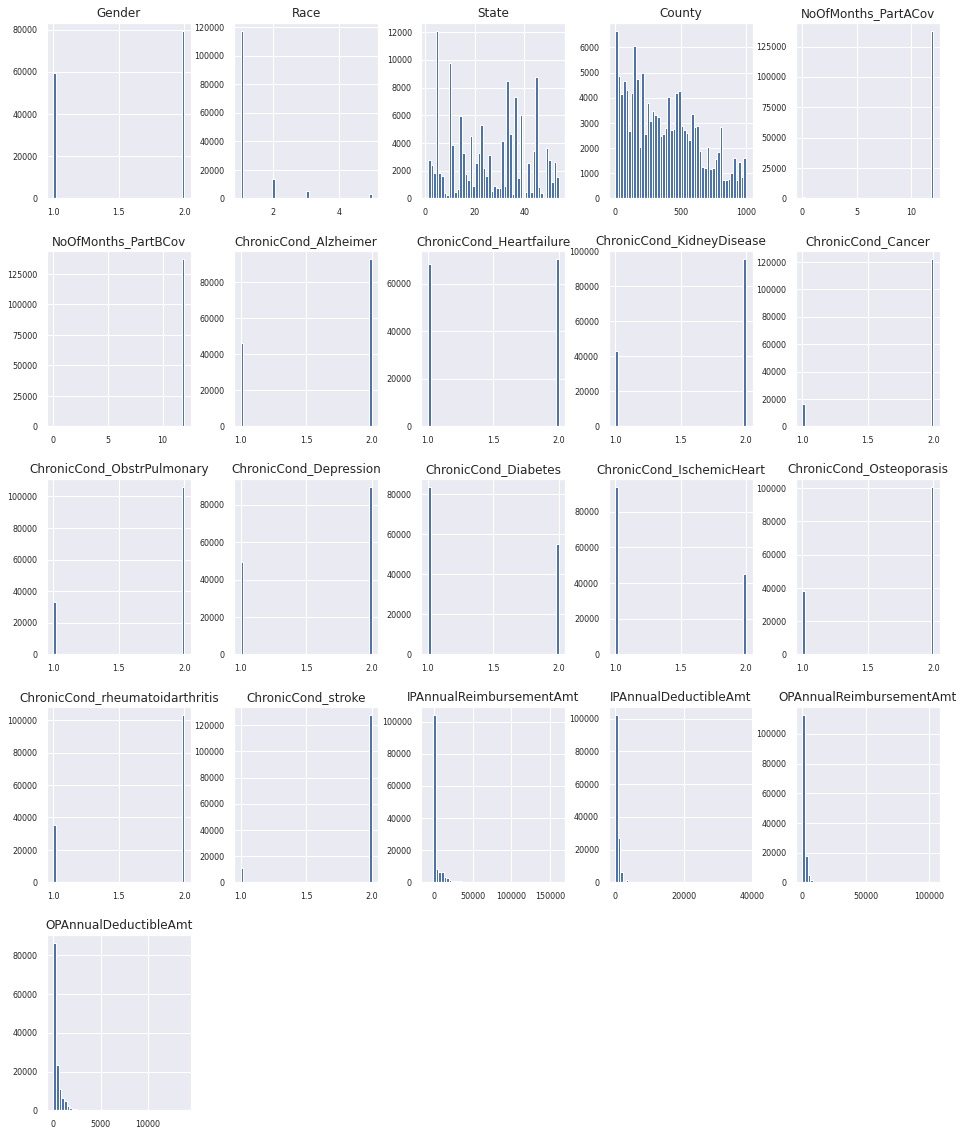

In [ ]:
train_ben.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Inpatient Dataset: 

In [ ]:
train_in.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_in['ClaimID'].nunique()

40474

In [ ]:
train_in['BeneID'].nunique()

31289

In [ ]:
train_in['Provider'].nunique()

2092

In [ ]:
train_in.shape

(40474, 30)

In [ ]:
train_in.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [ ]:
train_in.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [ ]:
train_in.corr().round(2)

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
InscClaimAmtReimbursed,1.00,NaN,-0.15,0.11,0.13,-0.09,0.66,NaN
DeductibleAmtPaid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_1,-0.15,NaN,1.00,0.03,0.05,0.10,0.73,NaN
ClmProcedureCode_2,0.11,NaN,0.03,1.00,0.03,0.08,0.65,NaN
ClmProcedureCode_3,0.13,NaN,0.05,0.03,1.00,0.14,-0.13,NaN
ClmProcedureCode_4,-0.09,NaN,0.10,0.08,0.14,1.00,0.30,NaN
ClmProcedureCode_5,0.66,NaN,0.73,0.65,-0.13,0.30,1.00,NaN
ClmProcedureCode_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
train_in.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Outpatient Dataset:

In [ ]:
train_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
train_out.shape

(517737, 27)

In [ ]:
train_out['Provider'].nunique()

5012

In [ ]:
train_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
train_out.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [ ]:
train_out.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [ ]:
train_out.corr().round(2)

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
InscClaimAmtReimbursed,1.00,-0.06,0.19,-0.65,1.0,NaN,NaN,0.09
ClmProcedureCode_1,-0.06,1.00,0.15,0.44,-1.0,NaN,NaN,-0.04
ClmProcedureCode_2,0.19,0.15,1.00,-0.49,1.0,NaN,NaN,0.22
ClmProcedureCode_3,-0.65,0.44,-0.49,1.00,-1.0,NaN,NaN,NaN
ClmProcedureCode_4,1.00,-1.00,1.00,-1.00,1.0,NaN,NaN,NaN
ClmProcedureCode_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeductibleAmtPaid,0.09,-0.04,0.22,NaN,NaN,NaN,NaN,1.00


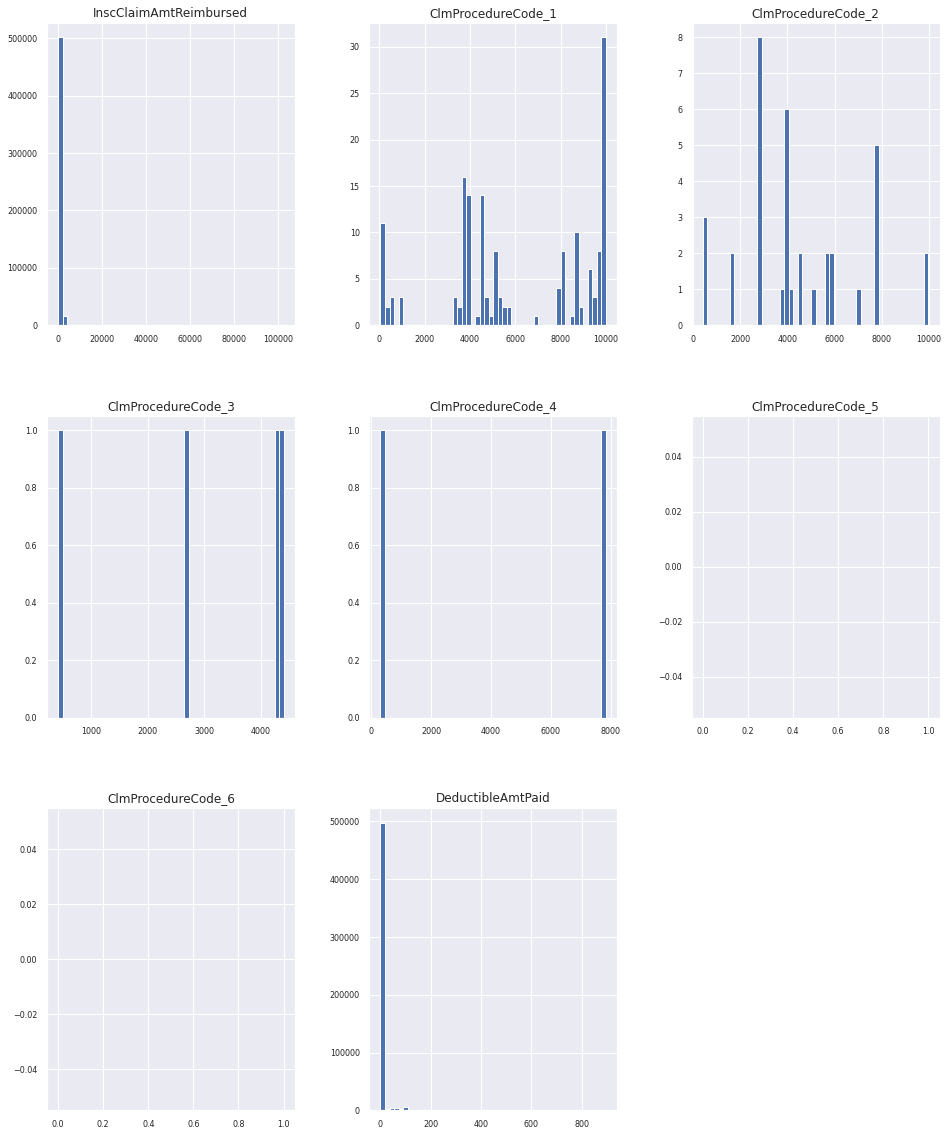

In [ ]:
train_out.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Merging the datasets:

In [ ]:
train_in['Claim_type']='Inpatient'
train_out['Claim_type']='Outpatient'

In [ ]:
final_train=pd.concat([train_in, train_out])
final_train=pd.merge(train_ben, final_train, on='BeneID')
final_train=pd.merge(final_train, train, on='Provider')

In [ ]:
final_train.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_type,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inpatient,Yes
1,BENE12511,1944-09-01,NaN,1,1,0,39,510,12,12,2,2,2,2,2,2,1,1,1,2,2,0,0,1250,90,CLM724430,2009-12-11,2009-12-11,PRV55912,600,PHY420794,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V560,V4283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient,Yes
2,BENE14577,1935-10-01,NaN,2,1,Y,33,70,12,12,2,1,1,2,2,2,2,1,2,2,1,0,0,2390,440,CLM567180,2009-09-07,2009-09-07,PRV55912,20,PHY381733,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient,Yes
3,BENE15074,1932-06-01,NaN,2,1,0,39,470,12,12,1,2,1,2,2,2,1,1,2,2,2,0,0,870,210,CLM259984,2009-03-22,2009-03-22,PRV55912,30,PHY371570,NaN,PHY393406,NaN,NaN,0.0,NaN,NaN,V812,40390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient,Yes
4,BENE16973,1932-05-01,NaN,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient,Yes


In [ ]:
final_train.shape

(558211, 56)

In [ ]:
final_train['PotentialFraud'].value_counts(normalize=True)*100

No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64

[Text(0, 0.5, 'Number of claims'), Text(0.5, 0, 'Fraudulent or not')]

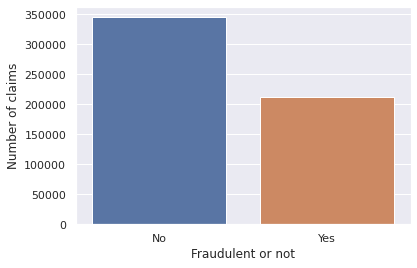

In [ ]:
groups = final_train.groupby(['PotentialFraud'], as_index=False)['ClaimID'].count()
#Drowing the barplot
ax=sns.barplot(x='PotentialFraud',y='ClaimID', data=groups)
ax.set(xlabel="Fraudulent or not", ylabel = "Number of claims")

[Text(0, 0.5, 'Average number of claims'), Text(0.5, 0, 'Fraudulent or not')]

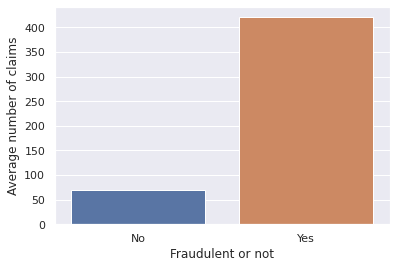

In [ ]:
groups = final_train.groupby(['Provider', 'PotentialFraud'], as_index=False)['ClaimID'].count()
groups=groups.groupby(['PotentialFraud'], as_index=False)['ClaimID'].mean()
ax=sns.barplot(x='PotentialFraud',y='ClaimID', data=groups)
ax.set(xlabel="Fraudulent or not", ylabel = "Average number of claims")

- IP Annual Reimbursement Amt:- Amount claimed by the beneficiary when admitted as an inpatient.
- OP Annual Reimbursement Amt:- Amount claimed by the beneficiary when admitted as an outpatient. 
- IP Annual Deductible Amt:- money inpatient should pay to the provider before applying for a claim. 
- OP Annual Deductible Amt: money outpatient should pay to the provider before applying for a claim.

[Text(0, 0.5, 'Average sum of IP Annual Deductible Amt taken by providers'),
 Text(0.5, 0, 'Fraudulent or not')]

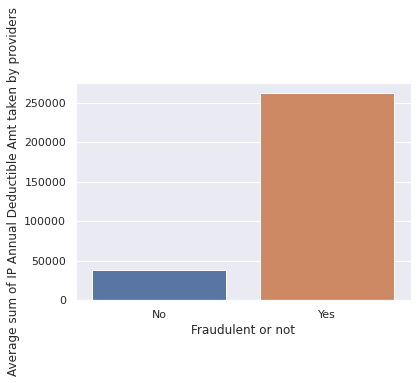

In [ ]:
groups = final_train.groupby(['Provider','PotentialFraud'], as_index=False)['IPAnnualDeductibleAmt'].sum()
groups=groups.groupby(['PotentialFraud'], as_index=False)['IPAnnualDeductibleAmt'].mean()
ax=sns.barplot(x='PotentialFraud',y='IPAnnualDeductibleAmt', data=groups)
ax.set(xlabel="Fraudulent or not", ylabel = "Average sum of IP Annual Deductible Amt taken by providers")

[Text(0, 0.5, 'Average sum of OP Annual Deductible Amt taken by providers'),
 Text(0.5, 0, 'Fraudulent or not')]

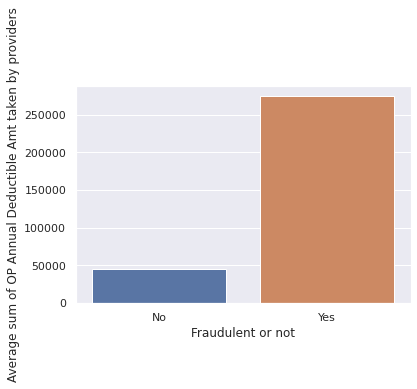

In [ ]:
groups = final_train.groupby(['Provider','PotentialFraud'], as_index=False)['OPAnnualDeductibleAmt'].sum()
groups=groups.groupby(['PotentialFraud'], as_index=False)['OPAnnualDeductibleAmt'].mean()
ax=sns.barplot(x='PotentialFraud',y='OPAnnualDeductibleAmt', data=groups)
ax.set(xlabel="Fraudulent or not", ylabel = "Average sum of OP Annual Deductible Amt taken by providers")

In [ ]:
groups = final_train.groupby(['PotentialFraud', 'Claim_type'], as_index=False)['ClaimID'].count()
groups

,PotentialFraud,Claim_type,ClaimID
0,No,Inpatient,17072
1,No,Outpatient,328343
2,Yes,Inpatient,23402
3,Yes,Outpatient,189394
